# Plot aggregate ribosome density around motifs

## Load libraries and define analysis-specific parameters

In [24]:
library(glue)
library(rtracklayer)
library(GenomicFeatures)
library(plyranges)
library(tidyverse)

theme_rasilab <- function() {
  theme_classic(base_family = "Helvetica", base_size = 6) +
    theme(
      strip.background = ggplot2::element_blank(),
      legend.text = element_text(size = 6),
      strip.text.x = element_text(size = 6),
    )
}

cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

theme_set(theme_rasilab())

ccds_annotations <- read_tsv("../data/gencode/gencode.v32.canonical_ccds.parameters.tsv.gz")
vk_type_motif_annotations <- read_tsv("../data/motif_counts/destabilizing_vk_motifs.tsv.gz")

studies_analyzed = "han2020"
samples_analyzed = ""
cell_types_analyzed = "293"

Rows: 19174 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): transcript_id, gene_id, gene_name, ccdsid
dbl (3): utr5_length, cds_length, utr3_length

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 38334 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): gene_name, transcript_id, motif, motif_type, nt72
dbl (2): loc, strength

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Load sample annotations

In [25]:
sample_annotations <- read_tsv("../annotations/sra_annotations.tsv") %>%
  filter(str_detect(study, studies_analyzed)) %>%
  filter(str_detect(sample_name, samples_analyzed)) %>%
  filter(str_detect(cell_type, cell_types_analyzed)) %>%
  select(gsm, study, sample_name) %>%
  group_by(gsm) %>% 
  slice(1) %>% 
  ungroup() %>% 
  print()

Rows: 2 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (18): srr, gsm, sample_name, gse, cell_type, study, study_subset, organi...
dbl  (1): pmid
lgl  (8): adapter, trim5, trim3, trim_condition, comment, sample_subset, his...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 2 × 3
  gsm        study   sample_name  
  <chr>      <chr>   <chr>        
1 GSM3907597 han2020 monosome_rep1
2 GSM3907598 han2020 monosome_rep2


## Load ribosome density around motifs in samples of interest

In [26]:
cvg <- '../data/vk_type_density/' %>% 
  list.files(full.names = T, pattern = 'tsv.gz$')  %>%
  enframe("sno", "file") %>%
  mutate(gsm = str_extract(file, 'GSM[:digit:]+')) %>%
  right_join(sample_annotations, by = "gsm") %>%
  mutate(data = map(file, read_tsv)) %>%
  mutate(n_motifs = map_int(data, nrow)) %>%
  filter(n_motifs > 100) %>%
  select(-sno, -file) %>%
  unnest(data) %>%
  group_by(sample_name) %>%
  arrange(-cds_read_density) %>%
  mutate(y_order = 1:n()) %>%
  ungroup() %>%
  pivot_longer(`-50`:`50`, names_to = 'pos', values_to = 'read_count') %>%
  mutate(pos = as.integer(pos)) %>%
  filter(read_count >= 0) %>%
  mutate(read_density = read_count / cds_read_density) %>%
  mutate(motif_type = fct_rev(motif_type)) %>%
  print()

Rows: 5012 Columns: 111
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr   (5): gene_name, transcript_id, motif, motif_type, nt72
dbl (106): loc, strength, cds_read_density, cds_read_count, start, end, -50,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 5202 Columns: 111
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr   (5): gene_name, transcript_id, motif, motif_type, nt72
dbl (106): loc, strength, cds_read_density, cds_read_count, start, end, -50,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 1,020,271 × 19
   gsm        study   sample_name   gene_name transcript_id   loc motif strength
   <chr>      <chr>   <chr>         <chr>     <chr>         <dbl> <chr>    <dbl>
 1 GSM3907598 han2020 monosome_rep2 HIST1H1E  ENST00000304…   265 ALAA…        6
 2 GSM3907598 han2020 monosome_rep2 HIST1H1E  ENST00000304…   265 ALAA…        6
 3 GSM3907598 han2020 monosome_rep2 HIST1H1E  ENST00000304…   265 ALAA…        6
 4 GSM3907598 han2020 monosome_rep2 HIST1H1E  ENST00000304…   265 ALAA…        6
 5 GSM3907598 han2020 monosome_rep2 HIST1H1E  ENST00000304…   265 ALAA…        6
 6 GSM3907598 han2020 monosome_rep2 HIST1H1E  ENST00000304…   265 ALAA…        6
 7 GSM3907598 han2020 monosome_rep2 HIST1H1E  ENST00000304…   265 ALAA…        6
 8 GSM3907598 han2020 monosome_rep2 HIST1H1E  ENST00000304…   265 ALAA…        6
 9 GSM3907598 han2020 monosome_rep2 HIST1H1E  ENST00000304…   265 ALAA…        6
10 GSM3907598 han2020 monosome_rep2 HIST1H1E  ENST00000304…   265 ALAA…        6
#

## Plot position-average ribosome density across motifs of interest

`summarise()` has grouped output by 'motif_type'. You can override using the `.groups` argument.


# A tibble: 200 × 4
   motif_type   pos read_density     n
   <fct>      <int>        <dbl> <int>
 1 stall        -50        0.709   488
 2 stall        -49        1.10    488
 3 stall        -48        1.70    488
 4 stall        -47        0.762   488
 5 stall        -46        0.995   488
 6 stall        -45        1.54    488
 7 stall        -44        0.631   488
 8 stall        -43        0.930   488
 9 stall        -42        1.39    488
10 stall        -41        0.599   488
# … with 190 more rows


Warning message:
“Ignoring unknown parameters: linewidth”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



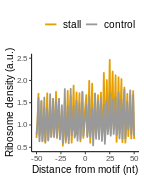

In [34]:
options(repr.plot.width = 1.2, repr.plot.height = 1.5)
plot_data <- cvg %>%
  group_by(transcript_id) %>% 
  mutate(has_vk_type_stall = if_else(max(strength) >= 9, T, F)) %>% 
  ungroup() %>% 
  filter(has_vk_type_stall) %>% 
  unite(sample_name, study, sample_name, sep=":") %>% 
  group_by(motif_type, pos) %>% 
  summarize(read_density = mean(read_density), n = dplyr::n()) %>% 
  ungroup() %>% 
  # filter(pos >= 22, pos <= 27) %>%
  print()

plot_data %>%
  ggplot(aes(x = pos, y = read_density, color = motif_type)) +
  # facet_wrap(~ sample_name, scales = "free_x") +
  geom_line(linewidth = 2) +
  scale_color_manual(values = c(cbPalette[c(2,1)])) +
  theme(legend.position = "top") +
  scale_y_continuous(breaks = c(0.5, 1.5, 2.5)) +
  ylim(0.5, 2.5)+
  labs(x = "Distance from motif (nt)", y = "Ribosome density (a.u.)", color = "") +
  theme(legend.position = "top", legend.key.width = unit(0.3, "cm")) +
  NULL

ggsave("../figures/vk_type_ribosome_density.pdf", width = 1.2, height = 1.5)

## Calculate and plot aggregate motif density within a window

`summarise()` has grouped output by 'motif_type', 'y_order'. You can override using the `.groups` argument.


# A tibble: 971 × 4
   motif_type y_order transcript_id      read_density
   <fct>        <int> <chr>                     <dbl>
 1 stall           88 ENST00000316084.10        0.932
 2 stall           95 ENST00000316084.10        0.818
 3 stall          102 ENST00000307839.9         0.985
 4 stall          113 ENST00000422514.7         1.39 
 5 stall          116 ENST00000422514.7         1.34 
 6 stall          119 ENST00000307839.9         1.02 
 7 stall          124 ENST00000311111.11        0.714
 8 stall          130 ENST00000409028.8         1.16 
 9 stall          133 ENST00000409028.8         1.47 
10 stall          134 ENST00000311111.11        0.705
# … with 961 more rows


Warning message:
“Transformation introduced infinite values in continuous y-axis”


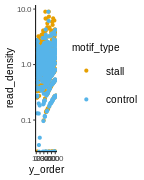

In [28]:
plot_data <- cvg %>%
  group_by(transcript_id) %>% 
  mutate(has_vk_type_stall = if_else(max(strength) >= 9, T, F)) %>% 
  ungroup() %>% 
  filter(has_vk_type_stall) %>% 
  filter(pos >= 20, pos <=30) %>% 
  group_by(motif_type, y_order, transcript_id) %>% 
  summarize(read_density = mean(read_density)) %>%
  ungroup() %>% 
  print()

plot_data %>% 
  ggplot(aes(x = y_order, y = read_density, color = motif_type)) +
  geom_point(size = 0.5) +
  scale_color_manual(values = cbPalette[c(2,3)]) +
  scale_y_log10()

## Same plot as above, but in Violin format

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 37 rows containing non-finite values (stat_ydensity).”
Saving 6.67 x 6.67 in image

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 37 rows containing non-finite values (stat_ydensity).”


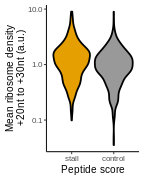

In [29]:
plot_data %>% 
  # ggplot(aes(x = motif_type, y = read_density, color = motif_type)) +
  ggplot(aes(x = motif_type, y = read_density, fill = motif_type)) +
  # geom_jitter(size = 0.5, height = 0) +
  geom_violin(color = "black") +
  # scale_color_manual(values = cbPalette[c(2,1)]) +
  scale_fill_manual(values = cbPalette[c(2,1)]) +
  guides(fill = F) +
  labs(x = "Peptide score", y = "Mean ribosome density\n+20nt to +30nt (a.u.)", color = "") +
  scale_y_log10()

ggsave(glue("../figures/mean_vk_type_density_20to30_{studies_analyzed}.pdf"))

## Compare the control and stall motif densities for significant differences

In [30]:
plot_data %>% 
  nest() %>% 
  mutate(test = map(data, function(df) wilcox.test(read_density ~ motif_type, data = df, alternative = "greater"))) %>% 
  mutate(n = map_int(data, nrow)) %>% 
  mutate(test_results = map(test, broom::tidy)) %>% 
  select(-data, -test) %>% 
  unnest(test_results) %>% 
  print()

Warning message:
“`...` must not be empty for ungrouped data frames.
Did you want `data = everything()`?”


# A tibble: 1 × 5
      n statistic   p.value method                                   alternative
  <int>     <dbl>     <dbl> <chr>                                    <chr>      
1   971    136409 0.0000109 Wilcoxon rank sum test with continuity … greater    


## Tabulate aggregate coverage density 

In [31]:
cvg %>% 
  filter(pos >= 20, pos <=30) %>% 
  group_by(motif_type, transcript_id) %>% 
  summarize(motif_read_density = mean(read_density), cds_read_density = mean(cds_read_density)) %>%
  ungroup() %>% 
  # mutate(sample_name = str_extract(sample_name, '[:digit:]$')) %>% 
  # pivot_wider(names_from = sample_name, values_from = c(motif_read_density, cds_read_density)) %>%
  arrange(desc(motif_read_density)) %>%
  left_join(vk_type_motif_annotations, by = c("motif_type", "transcript_id")) %>%
  left_join(select(ccds_annotations, transcript_id, gene_name), by = "transcript_id") %>%
  # select(-transcript_id) %>%
  write_tsv("../tables/20210215_vk_type_motifs_controls_han2020_plus20to30_mean_ribo_density.tsv.gz") %>%
  print()

`summarise()` has grouped output by 'motif_type'. You can override using the `.groups` argument.


# A tibble: 5,302 × 10
   motif_type transcript_id  motif_read_dens… cds_read_density gene_name.x   loc
   <chr>      <chr>                     <dbl>            <dbl> <chr>       <dbl>
 1 stall      ENST000003756…            13.4             0.629 HSPA1L       1179
 2 stall      ENST000002534…            10.0             0.823 GINS2         419
 3 control    ENST000003777…             9.18            3.33  HIST1H2BI      69
 4 stall      ENST000005509…             8.19            1.27  NACA         2577
 5 stall      ENST000005105…             8.15            0.523 SEPTIN11      545
 6 stall      ENST000005284…             8.06            0.594 RDX           535
 7 stall      ENST000002330…             7.68            0.722 DAZAP1        311
 8 control    ENST000003610…             7.53            0.540 MATR3        1399
 9 stall      ENST000003133…             6.79            0.387 TAF7         1181
10 control    ENST000005413…             6.72            3.72  TUBA1C        310
# … w

## Load transcript coverage

In [32]:
tx_coverage <- '../data/coverage/' %>% 
  list.files(full.names = T, pattern = '.transcripts.bedGraph.gz$')  %>%
  enframe("sno", "file") %>%
  mutate(gsm = str_extract(file, 'GSM[:digit:]+')) %>%
  right_join(sample_annotations, by = "gsm") %>%
  mutate(data = map(file, function(f) import.bedGraph(f) %>% as_tibble())) %>%
  print()

# A tibble: 2 × 6
    sno file                                    gsm   study sample_name data    
  <int> <chr>                                   <chr> <chr> <chr>       <list>  
1     1 ../data/coverage//GSM3907597.transcrip… GSM3… han2… monosome_r… <tibble>
2     2 ../data/coverage//GSM3907598.transcrip… GSM3… han2… monosome_r… <tibble>


## Plot transcript coverage around gene of interest


── Column specification ────────────────────────────────────────────────────────
cols(
  study = col_character(),
  sample_name = col_character(),
  gene_name = col_character(),
  stall_loc = col_double()
)



# A tibble: 5,662 × 6
   study   sample_name   gene_name stall_loc   loc count
   <chr>   <chr>         <chr>         <dbl> <int> <dbl>
 1 han2020 monosome_rep1 SSRP1           489     1     0
 2 han2020 monosome_rep1 SSRP1           489     2     0
 3 han2020 monosome_rep1 SSRP1           489     3     0
 4 han2020 monosome_rep1 SSRP1           489     4     0
 5 han2020 monosome_rep1 SSRP1           489     5     0
 6 han2020 monosome_rep1 SSRP1           489     6     0
 7 han2020 monosome_rep1 SSRP1           489     7     0
 8 han2020 monosome_rep1 SSRP1           489     8     0
 9 han2020 monosome_rep1 SSRP1           489     9     0
10 han2020 monosome_rep1 SSRP1           489    10     0
# … with 5,652 more rows


Saving 6.67 x 6.67 in image



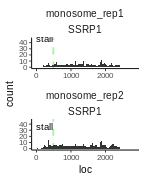

In [33]:
goi <- c("SSRP1")
plot_data <- tx_coverage %>% 
  select(-sno, -file, -gsm) %>% 
  unnest(data) %>% 
  mutate(seqnames = as.character(seqnames)) %>% 
  left_join(vk_type_motif_annotations %>% filter(motif_type == "stall"), by = c("seqnames" = "transcript_id")) %>%
  filter(gene_name %in% goi) %>% 
  unite(sample_name, study, sample_name, gene_name, loc, sep=":") %>%
  GRanges() %>%
  split(.$sample_name) %>%
  lapply(function (gr) coverage(gr, weight=gr$score) %>% unlist() %>% as.vector %>% enframe("loc", "count")) %>%
  bind_rows(.id = "sample_name") %>%
  separate(sample_name, into = c("study", "sample_name", "gene_name", "stall_loc"), sep = ":") %>%
  type_convert() %>% 
  print()

study <- plot_data %>% distinct(study) %>% pull(study)
gene_name <- plot_data %>% distinct(gene_name) %>% pull(gene_name)
stall_loc <- plot_data %>% group_by(sample_name, gene_name) %>% mutate(yloc = max(count)) %>% slice(1) %>% ungroup()

plot_data %>%
  ggplot(aes(x = loc, y = count)) +
  facet_wrap(~ sample_name + gene_name, ncol = 1, scales = "free_x") +
  geom_vline(aes(xintercept = stall_loc), data = stall_loc, color = "palegreen", linetype = "dashed") +
  geom_text(aes(x = stall_loc, y = yloc), data = stall_loc, label = "stall", size = 2, hjust = 1) +
  geom_area() 

ggsave(glue("../figures/20210215_coverage_{study}_{gene_name}.pdf"))